In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras.models import load_model

In [17]:
# img_path = '/home/pooh555/Downloads/dandelion.jpg'
# img_path = '/home/pooh555/Downloads/nm.jpeg'
# img_path = '/home/pooh555/pyproj/eyeAI/dataset/train/eye/eye.286.jpg'
# img_path = '/home/pooh555/pyproj/ophthalmology/dataset/class_disease_train/cataract/cataract.13.png'
# img_path = '/home/pooh555/pyproj/ophthalmology/dataset/class_disease_train/glaucoma/glaucoma.18.jpg'
# img_path = '/home/pooh555/pyproj/ophthalmology/dataset/class_disease_train/conjunctivitis/conjunctivitis.20.jpeg'
# img_path = '/home/pooh555/pyproj/ophthalmology/dataset/class_disease_train/normal/normal.105.png'
# img_path = '/home/pooh555/pyproj/ophthalmology/dataset/class_disease_train/glaucoma/glaucoma.18.jpg'
# img_path = '/home/pooh555/Downloads/dumb.jpg'

image_size = (128, 128)

In [18]:
img = keras.utils.load_img(
    img_path, target_size=image_size
)

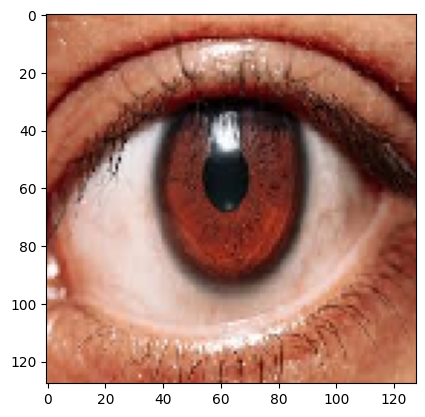

In [19]:
plt.imshow(img)

In [20]:
model = keras.models.load_model("disease_check.h5")

img_array = keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

model.summary()

predictions = model.predict(img_array)
predictions = predictions.flatten()
predicted_class = np.argmax(predictions)

i = 1
j = 0
max = 0.00
sum = 0.00      

for i in range(predicted_class+1):
    if(predictions[0] > predictions[i]):
        max = predictions[0]
    if(predictions[i] > predictions[i-1]):
        max = predictions[i]

sum = predictions[0]+predictions[1]+predictions[2]+predictions[3]
    
probability = (max/sum)*100

print(predictions)
class_names = ["cataract", "conjunctivitits", "glaucoma", "normal eyes"]

print(f"\nThis image is {class_names[predicted_class]}")
print("probability = ", probability, "%")

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       3584      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 flatten_1 (Flatten)         (None, 131072)            0         
                                                                 
 dense_3 (Dense)             (None, 128)               16777344  
                                                                 
 dense_4 (Dense)             (None, 128)               1651